# Verify override for all samples

In [1]:
import os
import sys
from pathlib import Path
from matplotlib import pyplot as plt


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

currentPath = Path.cwd()
print(currentPath)

from parse.loadParquetSample import loadParquetSample
from plot.plotFrequency import plotFrequency

/Users/opatiny/git/opatiny/predictiveMaintenance/src/notebooks


## Load parquet data

In [2]:
dataPath = os.path.join(currentPath, "../../data/")

machineName = "MILL"
sampleName = "13-03-2025_7h35.parquet"

# load data
print("loading data...")
data = loadParquetSample(os.path.join(dataPath, machineName, sampleName), debug=True)

print("data: ", data.shape)

loading data...
                          time  stSigAxCurrentB  stSigAxCurrentC  \
0  2025-03-13T07:35:46.832500Z              NaN         0.090607   
1  2025-03-13T07:35:46.832500Z         0.401429              NaN   
2  2025-03-13T07:35:46.833000Z              NaN         0.085270   
3  2025-03-13T07:35:46.833000Z         0.402414              NaN   
4  2025-03-13T07:35:46.833500Z              NaN         0.085270   

   stSigAxCurrentX  stSigAxCurrentY  stSigAxCurrentZ  stSigAxFollErrB  \
0              NaN         0.146562              NaN              NaN   
1         0.082901              NaN         1.409325         0.000002   
2              NaN         0.198023              NaN              NaN   
3         0.089221              NaN         1.408720         0.000002   
4              NaN         0.198023              NaN              NaN   

   stSigAxFollErrC  stSigAxFollErrX  stSigAxFollErrY  ...  lrSigSpindleTemp  \
0              NaN         0.001797         0.001325  ...

In [3]:
print("interpolated time vector: ", data["timeSeconds"])

interpolated time vector:  0             0.0000
1             0.0005
2             0.0010
3             0.0015
4             0.0020
             ...    
3178997    1589.4985
3178998    1589.4990
3178999    1589.4995
3179000    1589.5000
3179001    1589.5005
Name: timeSeconds, Length: 3179002, dtype: float64


plotting time vector...


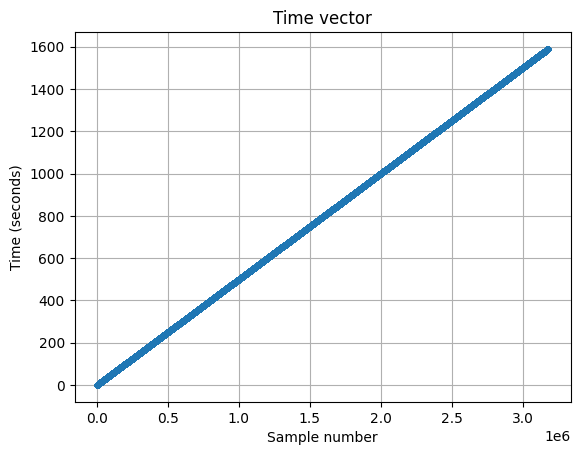

In [4]:
print("plotting time vector...")
plt.figure()
plt.plot(data["timeSeconds"], "-o", markersize=3)
plt.title("Time vector")
plt.xlabel("Sample number")
plt.ylabel("Time (seconds)")
plt.grid()
plt.show()

plotting frequency...


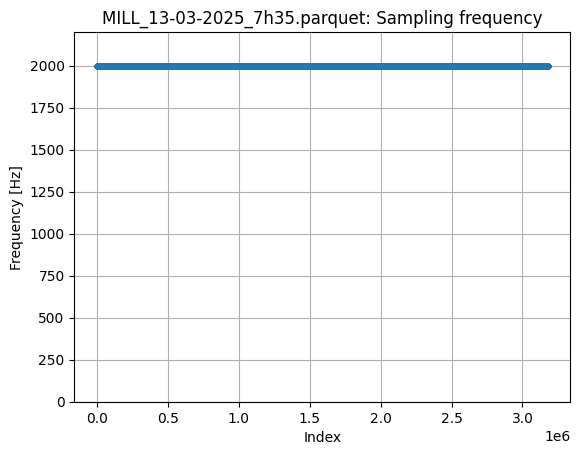

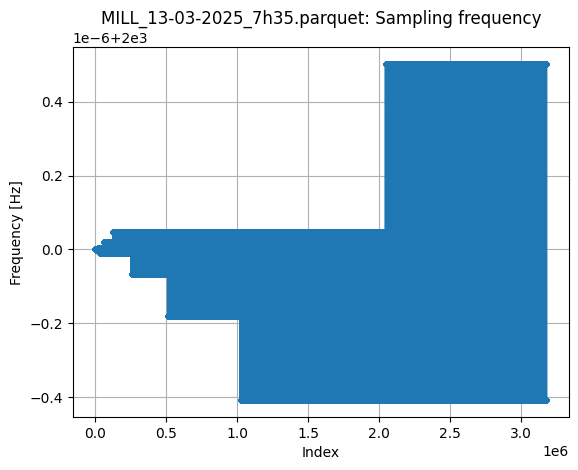

In [5]:

# plot frequency
print("plotting frequency...")
plotFrequency(data["timeSeconds"], machineName + "_" + sampleName, ylimits=True)

plotFrequency(data["timeSeconds"], machineName + "_" + sampleName)

## Load csv data

In [6]:
from parse.loadCsvSample import loadCsvSample


dataPath = os.path.join(currentPath, "../../data/")

machineName = "Mecatis"
sampleName = "03_02_25"

# load data
print("loading data...")
data = loadCsvSample(os.path.join(dataPath, machineName, sampleName), debug=False)

print("data: ", data.shape)
# print first rows
print(data.head())

loading data...
data:  (3306285, 75)
   timeSeconds  stSigSpindleVelocity  stTimeStampFast  lrSigCryoLubState  \
0       0.0000                   0.0     1.338305e+17                0.0   
1       0.0005                   0.0     1.338305e+17                0.0   
2       0.0010                   0.0     1.338305e+17                0.0   
3       0.0015                   0.0     1.338305e+17                0.0   
4       0.0020                   0.0     1.338305e+17                0.0   

   process  stSigAxVeloMCSC  stSigAxVeloACSC  lrSigSpindleTemp  \
0      0.0              0.0              0.0            -200.0   
1      0.0              0.0              0.0            -200.0   
2      0.0              0.0              0.0            -200.0   
3      0.0              0.0              0.0            -200.0   
4      0.0              0.0              0.0            -200.0   

   stSigAxVeloACSB  stSigAxVeloMCSB  ...  stSigCOMThresholdConfirmation  \
0         0.000300              0.

plotting frequency...


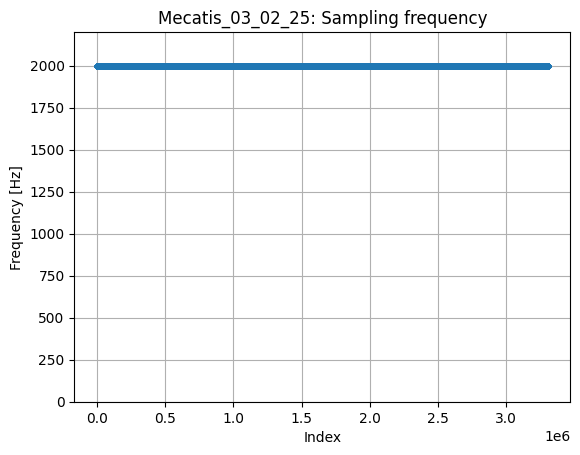

In [7]:
# plot frequency
print("plotting frequency...")
plotFrequency(data["timeSeconds"], machineName + "_" + sampleName, ylimits=True)